In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize

# Dejanski podatki

Vir: Delo *([Širjenje koronavirusa v Sloveniji](https://www.delo.si/images/slike/2020/03/12/2547425.jpg))*

In [2]:
okuzeni = np.array([1, 6, 8, 12, 16, 25, 34, 57, 96])
dni = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

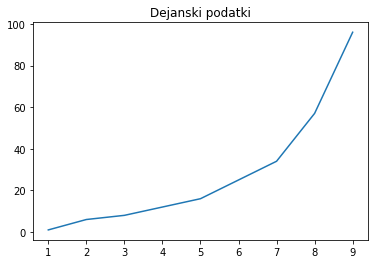

In [3]:
plt.plot(dni, okuzeni)
plt.title("Dejanski podatki")
plt.show()

# Eksponentna funkcija

$$ f(x) = a^{x - b} $$

In [4]:
def eksp(x, a, b):
    return a**(x-b)

In [5]:
apr, pcov = scipy.optimize.curve_fit(eksp, dni, okuzeni)

Najdeni paremetri funkcije:

In [6]:
a, b = apr
print("a = %.2f" % a)
print("b = %.2f" % b)
print("")
print("f(x) = %.2f ^ (x - (%.2f))" % (a, b))

a = 1.59
b = -0.86

f(x) = 1.59 ^ (x - (-0.86))


## Ujemanje najdene funkcije s podatki

In [7]:
preds = eksp(dni, a, b)

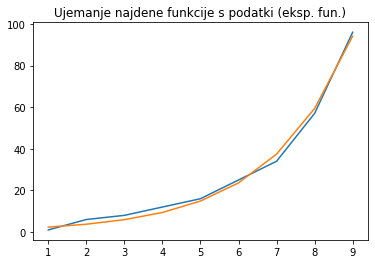

In [8]:
plt.plot(dni, okuzeni)
plt.plot(dni, preds)
plt.title("Ujemanje najdene funkcije s podatki (eksp. fun.)")
plt.show()

## Napoved za naprej

In [9]:
dbl = math.log(2)/math.log(a)
print("Št. okuženih se podvoji na %.2f dni." % dbl)

Št. okuženih se podvoji na 1.50 dni.


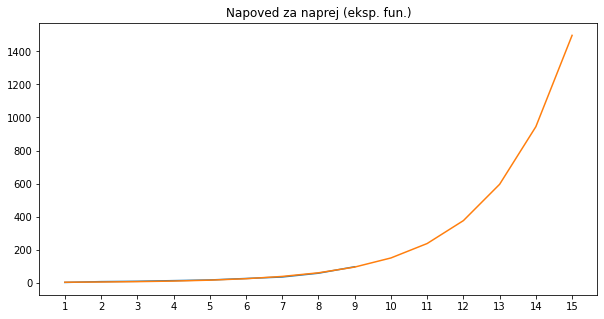

In [10]:
dni2 = np.array([i for i in range(1, 16)])
preds2 = eksp(dni2, a, b)

plt.figure(figsize=(10,5))
plt.xticks(dni2)

plt.plot(dni, okuzeni)
plt.plot(dni2, preds2)
plt.title("Napoved za naprej (eksp. fun.)")
plt.show()

---

%%latex
\newpage

# Linearna funkcija na logaritmiranih podatkih

Števila na navpični osi predstavljajo eksponent nad 10 (*npr.* $ 2 $ pomeni $ 10^2 = 100 $ )

In [11]:
okuzeni_log = np.log(okuzeni)/np.log(10)

$$ f(x) = k * x + n $$

## Graf logaritmiranih podatkov

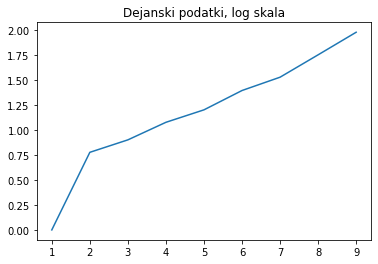

In [12]:
plt.plot(dni, okuzeni_log)
plt.title("Dejanski podatki, log skala")
plt.show()

In [13]:
def lin(x, k, n):
    return k*x + n

In [14]:
# Prva dva dni se zaradi odstopanja ne upošteva
apr1, pcov1 = scipy.optimize.curve_fit(lin, dni[2:], okuzeni_log[2:])

Najdeni parametri linearne funkcije:

In [15]:
k, n = apr1
print("k = %.2f" % k)
print("n = %.2f" % n)
print("")
print("f(x) = %.2f*x + %.2f" % (k, n))

k = 0.18
n = 0.35

f(x) = 0.18*x + 0.35


Pretvorjeno v eksponentno funkcijo z linearno skalo:

In [16]:
a1 = np.exp(k*np.log(10))
b1 = -np.exp((n)*np.log(10))

print("a = %.2f" % a1)
print("b = %.2f" % b1)
print("")
print("f(x) = %.2f ^ (x - (%.2f))" % (a1, b1))

a = 1.50
b = -2.26

f(x) = 1.50 ^ (x - (-2.26))


## Ujemanje najdene funkcije s podatki

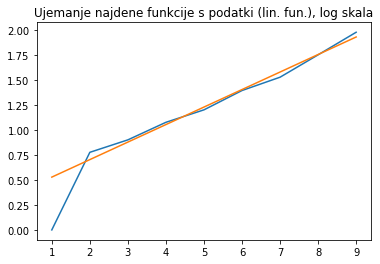

In [17]:
preds1 = lin(dni, k, n)
plt.plot(dni, okuzeni_log)
plt.plot(dni, preds1)
plt.title("Ujemanje najdene funkcije s podatki (lin. fun.), log skala")
plt.show()

## Napoved za naprej

In [18]:
dbl = math.log(2)/math.log(a1)
print("Št. okuženih se podvoji na %.2f dni." % dbl)

Št. okuženih se podvoji na 1.71 dni.


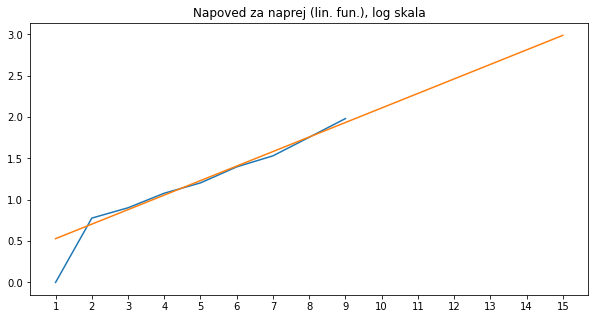

In [19]:
preds12 = lin(dni2, k, n)

plt.figure(figsize=(10,5))
plt.xticks(dni2)

plt.plot(dni, okuzeni_log)
plt.plot(dni2, preds12)
plt.title("Napoved za naprej (lin. fun.), log skala")
plt.show()

## Napoved za naprej, linearna skala

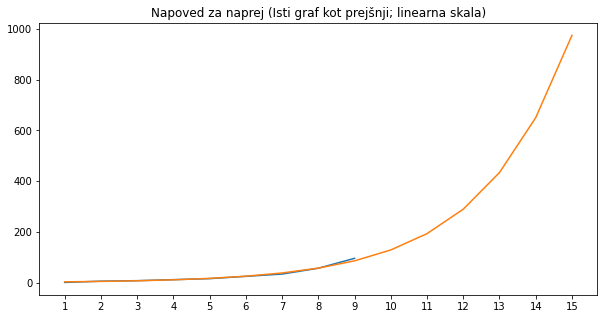

In [20]:
preds12e = np.exp(lin(dni2, k, n)*np.log(10))
plt.figure(figsize=(10,5))
plt.xticks(dni2)

plt.plot(dni, okuzeni)
plt.plot(dni2, preds12e)
plt.title("Napoved za naprej (Isti graf kot prejšnji; linearna skala)")
plt.show()